In [19]:
import numpy as np
import pandas as pd
import pylab as Plot

import matplotlib.pyplot as plt
import seaborn as sns

from plotly.graph_objs import *
import plotly.plotly as py
import plotly.tools as tls

from sklearn.manifold import TSNE
import sklearn.cluster as cluster
import time

%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}


### Import datasets

In [20]:
the_data = pd.read_csv('the_data.csv')
print "'the_data' dataset has {} samples with {} features each.".format(*the_data.shape)

'the_data' dataset has 170842 samples with 83 features each.


In [22]:
big_data = pd.read_csv('big_data.csv')
print "'big_data' dataset has {} samples with {} features each.".format(*big_data.shape)

big_data.head()

'big_data' dataset has 170842 samples with 432 features each.


,CASEID,T010101,T010102,T010199,T010201,T010299,T010301,T010399,T010401,T010499,...,T181801,T181899,T189999,T500101,T500103,T500104,T500105,T500106,T500107,T509989
0,1.0,870.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,620.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,560.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,720.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,385.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = big_data.drop(['T050101'], axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, big_data['T050102'], test_size=0.25, random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score

0.999901324348


In [4]:
samples_data = pd.DataFrame(big_data.sample(n=7))
outta_data = pd.DataFrame(the_data)

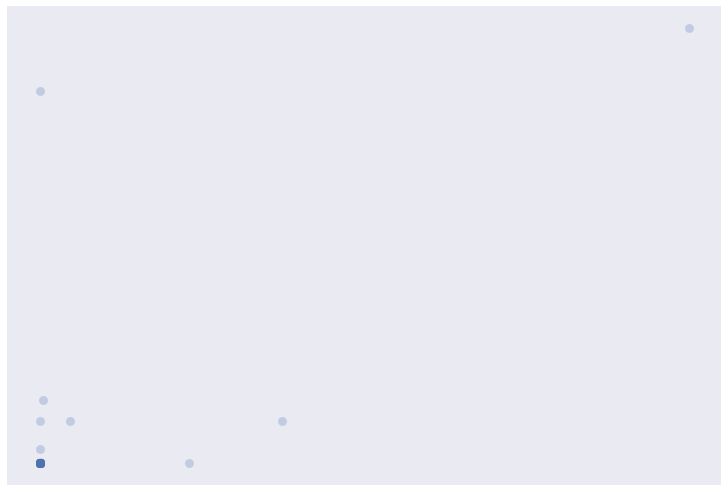

In [5]:
plt.scatter(outta_data.T[0], outta_data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

### Dimensionality reduction
There are many zeroes in our data. In the 'autus_data_clean' we manually merged and renamed some data. In this part I will use both the manually merged data ('the_data') and the dimensionality reducted data of 'big_data' where the datapoints have not been manually merged.

In [3]:
%%time

from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import normalize 

svd = TruncatedSVD(n_components=10)
embedded_coords = normalize(svd.fit_transform(big_data), norm='l1')

CPU times: user 6.38 s, sys: 1.18 s, total: 7.56 s
Wall time: 5.18 s


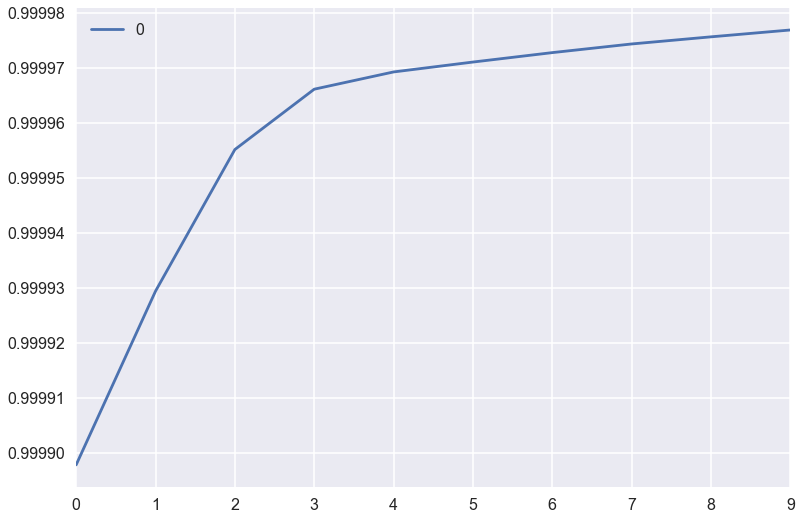

In [4]:
pd.DataFrame(np.cumsum(svd.explained_variance_ratio_)).plot()

In [5]:
#Create a datafram out of the embedded_coords
embc = pd.DataFrame(embedded_coords)
embc.head()

,0,1,2,3,4,5,6,7,8,9
0,0.004065,0.664236,-0.124971,0.002270,-0.036617,-0.023544,-0.028112,-0.045193,-0.027699,-0.043293
1,0.003606,0.433344,-0.063518,-0.155101,0.325984,-0.006948,0.001630,-0.006286,0.001406,0.002178
2,0.005775,0.562626,-0.092713,-0.112116,0.168535,0.019574,0.007173,0.004786,0.024680,0.002021
3,0.007343,0.710170,-0.134402,-0.005294,-0.041507,-0.004113,-0.017830,-0.032625,-0.008505,-0.038211
4,0.007310,0.460214,0.408180,0.030949,-0.001286,0.009709,-0.006419,0.012732,0.031268,0.031934


In [7]:
#Decrease the data to make it easier to calculate
samples = embc.sample(n=7)
outta = embc.sample(n=5000)

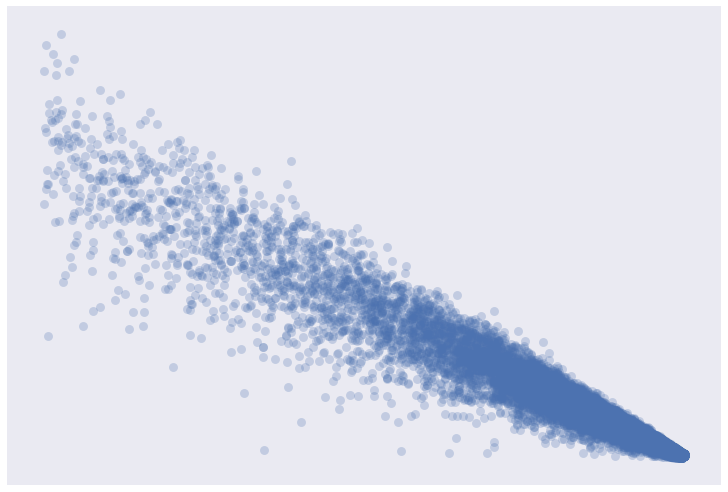

In [8]:
plt.scatter(embc[0], embc[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [9]:
#Use the silhouette score to give us an idea of how many clusters there are in the data

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

cluster_range = list(range(2,6)) 
#Go through with different n_components to find the best silhouette score

for n_cluster in cluster_range:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_components = n_cluster, random_state=2).fit(outta)
    
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(outta)
    
    # TODO: Find the cluster centers
    centers = clusterer.means_
    
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(samples)
    
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(outta, preds)
    
    print "The score for n_cluster = {}. is : {}". format(n_cluster, score)

NameError: name 'KMeans' is not defined

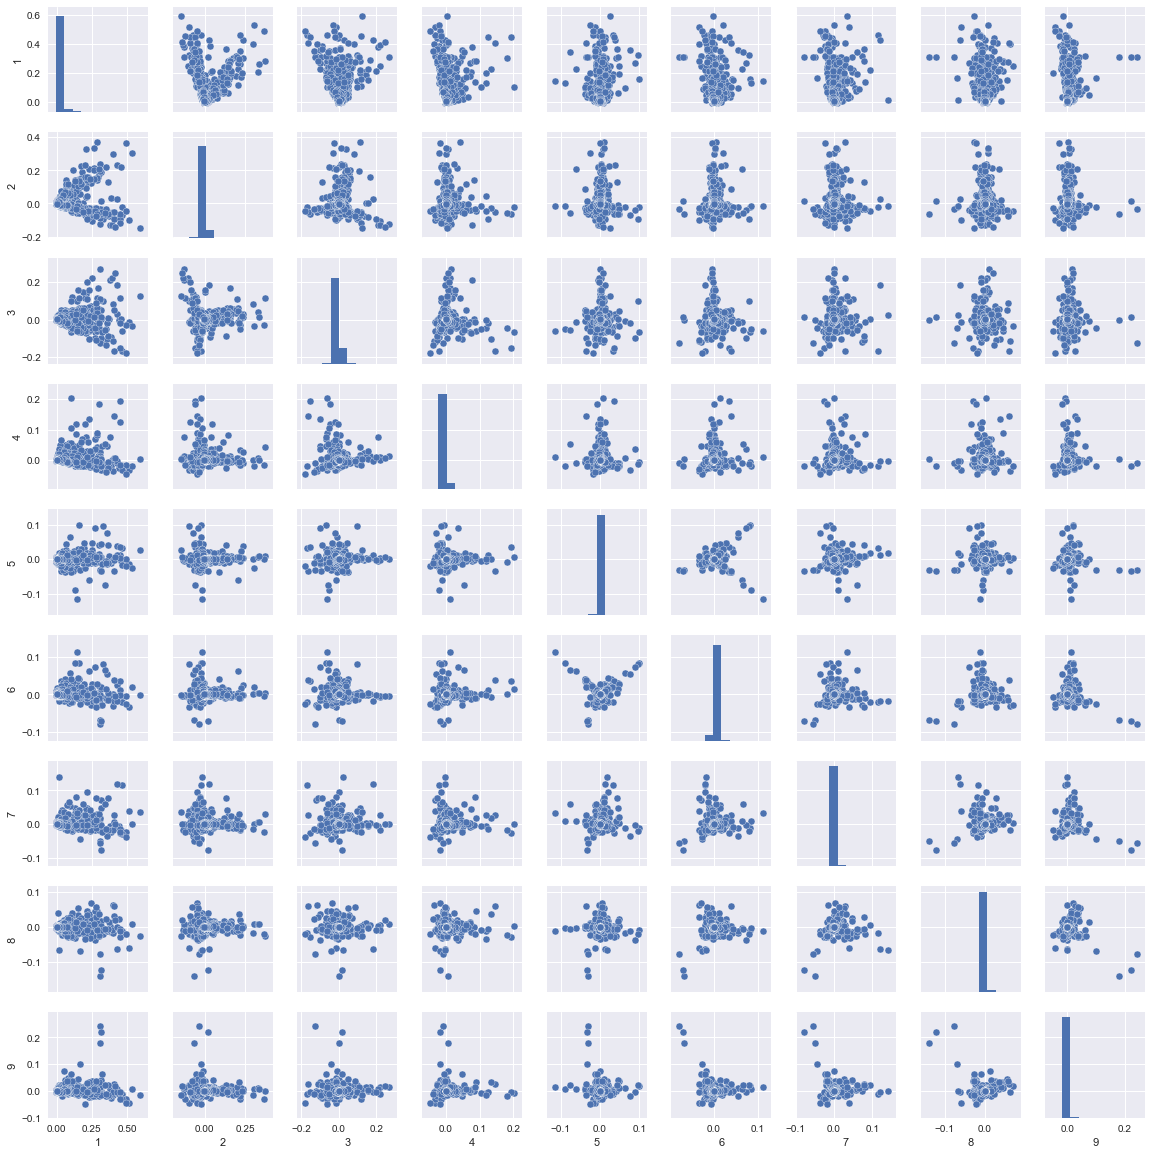

In [16]:
sns.pairplot(outta, size=1.8)

In [8]:
%%time

from scipy.stats import rankdata
embedded_ranks = np.array([rankdata(c) for c in embc.T]).T

from sklearn.cluster import KMeans
n_clusters = 2
km = KMeans(n_clusters)
clusters = km.fit_predict(outta)

CPU times: user 16.7 s, sys: 171 ms, total: 16.8 s
Wall time: 16.9 s


In [7]:
clusterer = GaussianMixture(n_components = 2).fit(outta)
preds = clusterer.predict(outta)
centers = clusterer.means_
sample_preds = clusterer.predict(samples)

# Display the results of the clustering from implementation
vs.cluster_results(outta, preds, centers, pca_samples)

NameError: name 'GaussianMixture' is not defined

In [9]:
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(outta) 
dftsne = pd.DataFrame(z, columns=['x','y'])

In [7]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data[0], data[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [17]:
from scipy.stats import rankdata
embedded_ranks = np.array([rankdata(c) for c in embedded_coords.T]).T

from sklearn.cluster import KMeans
n_clusters = 2
km = KMeans(n_clusters)
clusters = km.fit_predict(embedded_ranks)
labels = km.labels_

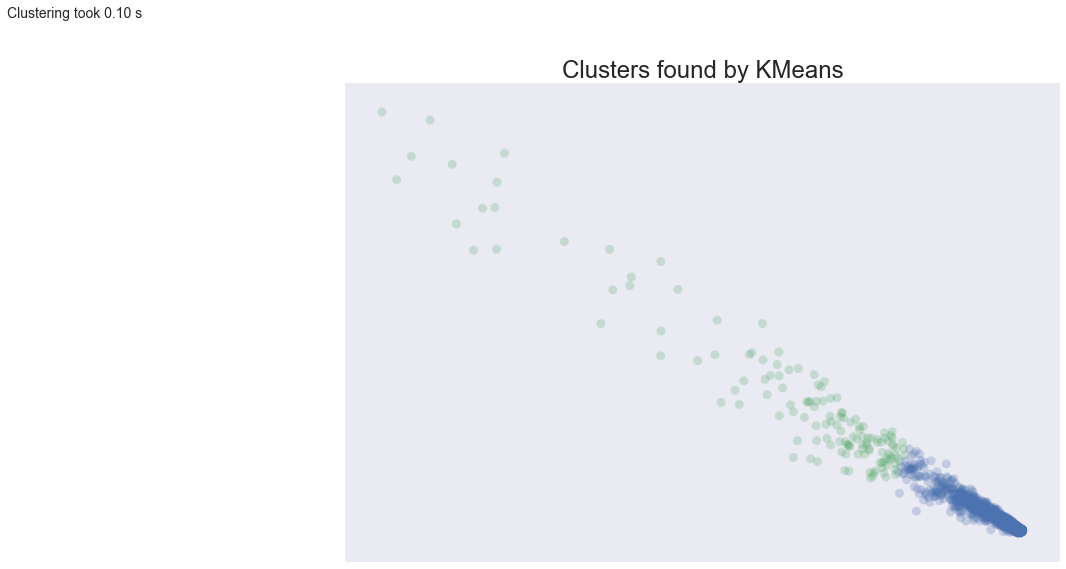

In [9]:
plot_clusters(outta, cluster.KMeans, (), {'n_clusters':2})

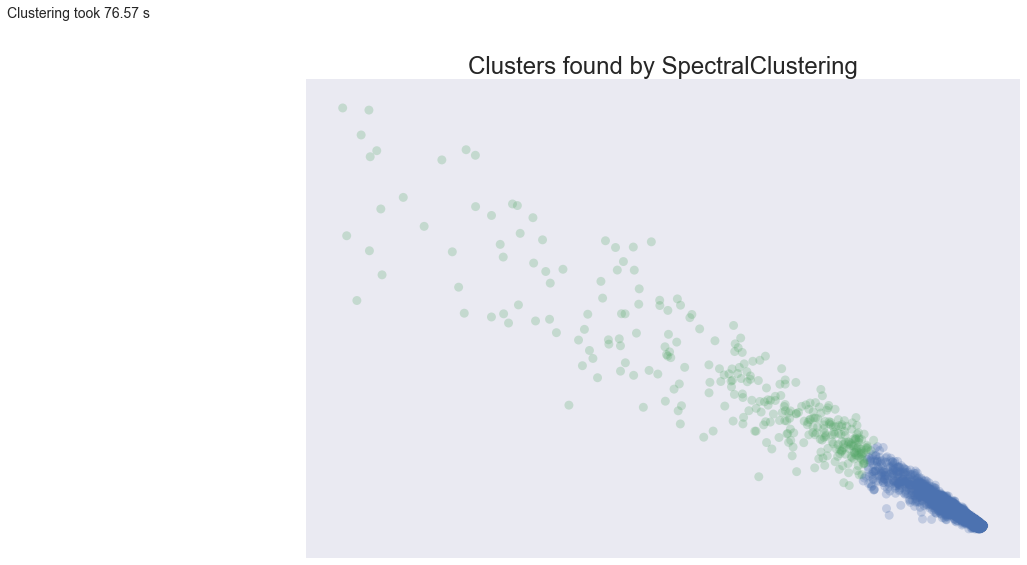

In [10]:
plot_clusters(outta, cluster.SpectralClustering, (), {'n_clusters':2})

In [10]:
result = TSNE(n_components=2, random_state=0).fit_transform(outta)
print result

[[ -5.93699859  10.74446893]
 [ -4.29131169 -12.18428883]
 [  5.29375431   8.25425985]
 ..., 
 [ -6.35034787   1.82729769]
 [-13.10224782   3.52408994]
 [  3.79147218   6.10574096]]


ValueError: Invalid RGBA argument: 0

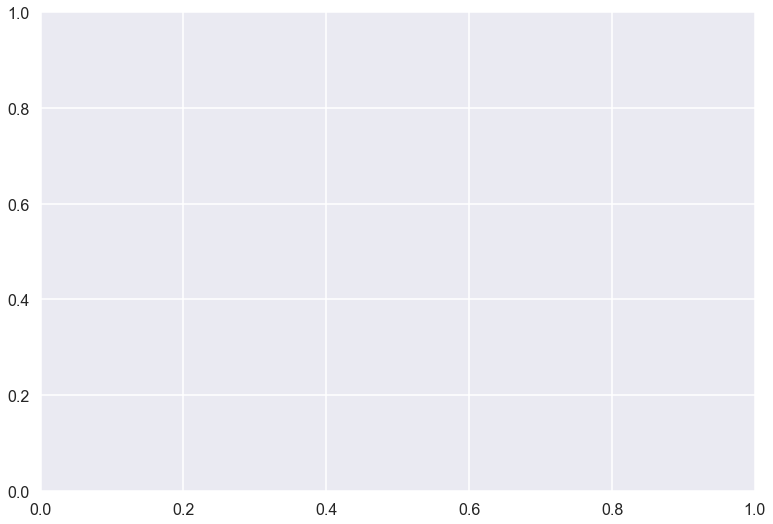

In [18]:
Plot.scatter(result[:,0], result[:,1], c=labels, cmap=plt.cm.get_cmap("Vega20b", 20))
plt.colorbar(ticks=range(20))
Plot.show()

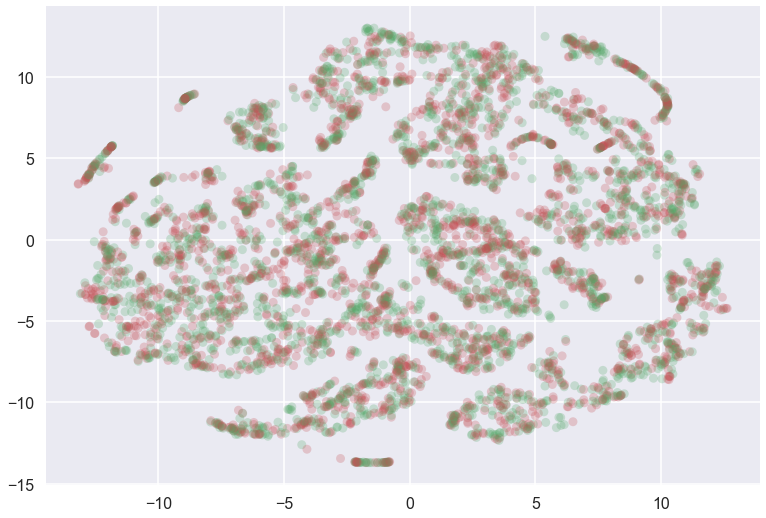

In [78]:
labels_frame = pd.DataFrame(result)

colors = 'r', 'g'
plt.scatter(labels_frame[0], labels_frame[1], c=colors, **plot_kwds)

In [12]:
import bokeh.plotting as bp
from bokeh.models import HoverTool 
from bokeh.charts import Scatter, output_file, show
from bokeh.sampledata.autompg import autompg as df

bp.output_notebook()
row_selector = outta

Loading BokehJS ...

In [89]:
labels_frame.columns = ["Cluster 1", "Cluster 2"]
labels_frame

,Cluster 1,Cluster 2
0,1.068863,7.970624
1,7.429155,2.086847
2,5.410915,-7.923537
3,-12.095036,-3.717477
4,3.144908,-3.260175
5,-10.074020,3.626616
6,1.190532,9.977553
7,-1.421580,13.018022
8,-12.737446,4.042202
9,-6.765539,6.055442


In [94]:
ax = labels_frame.plot.scatter(x='Cluster 1', y='Cluster 2', color='DarkBlue', 'DarkRed', label='Group 1', 'Group 2')

SyntaxError: non-keyword arg after keyword arg (<ipython-input-94-7a2373695fec>, line 1)

In [ ]:
#gera scatterplot með mismunandi litum fyrir cluster 1 og 2
#Hvernig er hægt að vita í hvaða cluster viðkomandi tilheyrir?

colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c", 
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5", 
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f", 
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])

bp.figure(plot_width=900, plot_height=700, title="Time in day",
       tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
       x_axis_type=None, y_axis_type=None, min_border=1)
Scatter(
    x = result[:,0], 
    y = result[:,1],
    color= colormap[clusters[outta]],
    #radius= np.log2(users_per_subreddit[outta])/60, 
    #source=bp.ColumnDataSource({"subreddit": subreddits[row_selector]})).select(dict(type=HoverTool)).tooltips = {"/r/":"@subreddit"}
    )
Scatter.show()

In [15]:
from bokeh.charts import Scatter, output_file, show

colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c", 
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5", 
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f", 
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])

p = Scatter(df, x=result[:,0], y=result[:,1], colormap[clusters[outta]])

show(p)


SyntaxError: non-keyword arg after keyword arg (<ipython-input-15-56be7efeaef5>, line 10)